<a href="https://colab.research.google.com/github/3madMostafa/selected_project/blob/main/SVM_malaria_detection(v2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

kaggle API

In [2]:
#import os
#os.environ ['KAGGLE_CONFIG_DIR']= '/content'

In [ ]:
#!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

In [ ]:
#!unzip \*.zip && rm *.zip

importing libraries

In [5]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os
print(os.listdir("/content/Untitled Folder"))

[]


Data preprocessing and Data AUGMENTATION and Data extraction

In [5]:
x = list()
y = list()

infected = os.listdir('/content/Untitled Folder/cell_images/Parasitized/') 
uninfected = os.listdir('/content/Untitled Folder/cell_images/Uninfected/')


for i in infected:
    try:
    
        image = cv2.imread("/content/Untitled Folder/cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((70 , 70))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        x.append(np.array(resize_img))
        x.append(np.array(rotated45))
        x.append(np.array(rotated75))
        x.append(np.array(blur))
        y.append(1)
        y.append(1)
        y.append(1)
        y.append(1)
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("/content/Untitled Folder/cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((70 , 70))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        x.append(np.array(resize_img))
        x.append(np.array(rotated45))
        x.append(np.array(rotated75))
        y.append(0)
        y.append(0)
        y.append(0)
        
    except AttributeError:
        print('')

x = np.array(x)
y = np.array(y)

reshapeing data

In [6]:
x = x.reshape(x.shape[0],x.shape[1]*x.shape[2]*x.shape[3])


Data splitting

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

#svm model
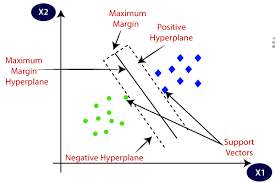

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [9]:
model_svc = SVC(kernel= 'poly',degree=3,max_iter=100,C=1.0,gamma='auto',verbose=True,random_state=32)
model_svc.fit(x_train, y_train)

[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(gamma='auto', kernel='poly', max_iter=100, random_state=32, verbose=True)

In [10]:
pred = model_svc.predict(x_test)

In [ ]:
accuracy_score(y_test, pred)

0.6606303566491568

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , pred)
print('confusion matrix \n',  cm)

confusion matrix 
 [[ 7072  5225]
 [ 4595 12044]]


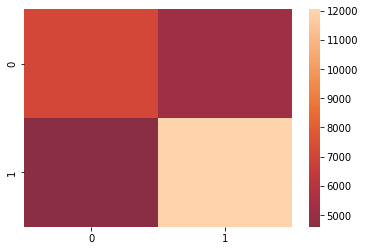

In [ ]:
import seaborn as sns
sns.heatmap(cm, center=True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
pred = model_svc.predict(x_test)
y_labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, y_labels))

              precision    recall  f1-score   support

           0       0.61      0.58      0.59     12297
           1       0.70      0.72      0.71     16639

    accuracy                           0.66     28936
   macro avg       0.65      0.65      0.65     28936
weighted avg       0.66      0.66      0.66     28936



<ipython-input-36-38f3d028fe8b>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_labels = (pred > 0.5).astype(np.int)


🍘 Computing Area Under Curve (AUC)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc  #area under curve
fpr, tpr, score = roc_curve(y_test.ravel(), y_labels.ravel())
auc = auc(fpr, tpr)
auc   # fpr = "specificity"   & tpr = "sestivity"

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

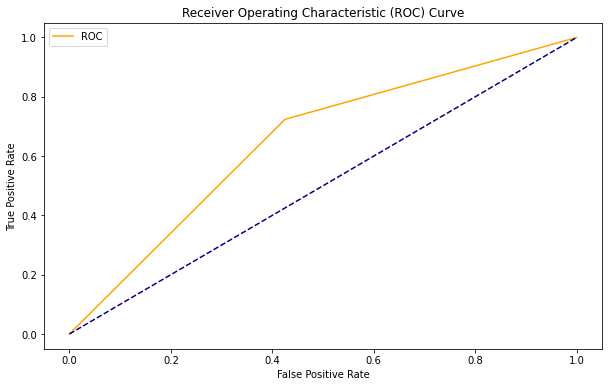

In [ ]:
plot_roc_curve(fpr, tpr)

🖼️ model prediction

In [7]:
import tensorflow as tf
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

m = list()
img = '/content/cell_images/Parasitized/C116P77ThinF_IMG_20150930_171809_cell_71.png'
img = cv2.imread(img)
image_data = cv2.resize(img,(70,70))
m.append(image_data)
m = np.array(m)

In [8]:
w = m.reshape(m.shape[0],m.shape[1]*m.shape[2]*m.shape[3])

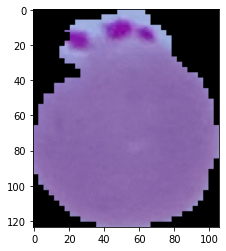

In [9]:
def show_img(img2):
        cv2.imwrite("/content/cell_images/Parasitized/C116P77ThinF_IMG_20150930_171809_cell_71.png", (70,70))
        img = cv2.resize(img2, (70,70))
        plt.imshow(img2, cmap=plt.cm.binary)
        plt.show()
show_img(img)        

In [14]:
y_pred = model_svc.predict(w)
y_pred = (y_pred > 0.5)

if (y_pred==False):
    print('Uninfected')
else:
    print('Parasitized')

Parasitized


# k fold cross validation
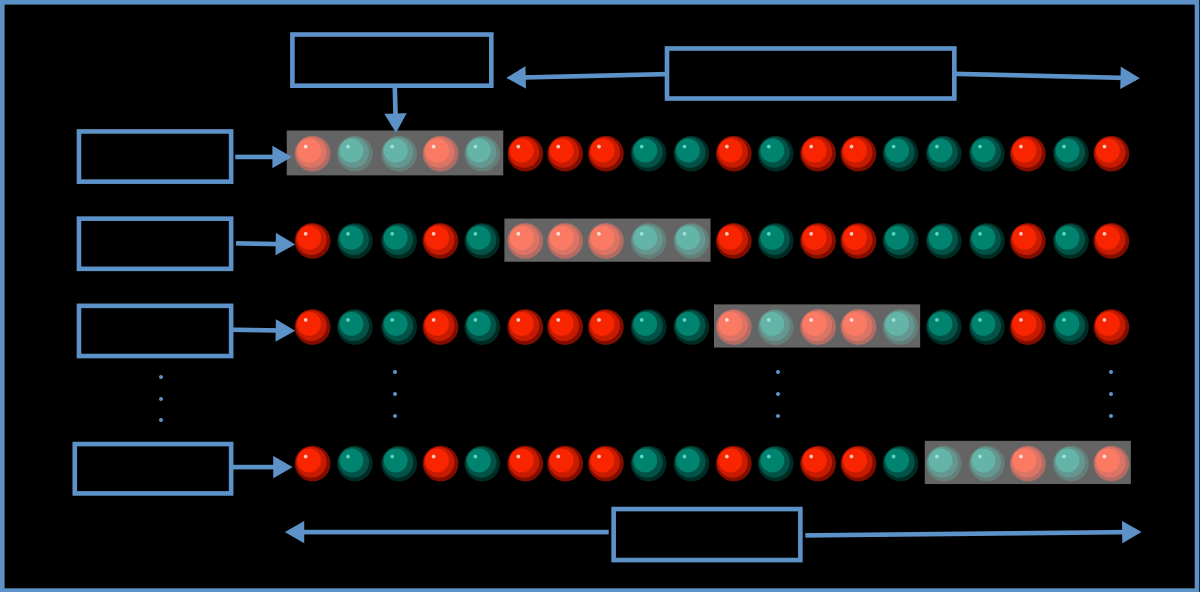

In [15]:
# k_fold cv
from sklearn.model_selection import cross_val_score
# 5 fold
scores = cross_val_score(model_svc, x_train, y_train, scoring='r2', cv=4)


[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [16]:
# printing the average score
print (np.mean(scores))

-0.6482645265533535


In [17]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model_svc, x_test , y_test)
pred

[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


array([1, 1, 1, ..., 1, 0, 0])

In [18]:
scores_test = cross_val_score(model_svc, x_train, y_train, scoring='r2', cv=5)

[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[LibSVM]

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [19]:
print (np.mean(scores_test))

-0.7793886944405285
